<a href="https://colab.research.google.com/github/luvr1/CCMACLRL_EXERCISES/blob/main/midtermexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Training Data

In [51]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [53]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [54]:
traindata.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [55]:
X = traindata.drop(columns=["FloodProbability"])
y = traindata["FloodProbability"]

In [56]:
X_train, X_val, y_train, y_val = train_test_split(traindata.drop('FloodProbability', axis=1), traindata['FloodProbability'],
test_size=0.2, random_state=42)

In [57]:
data_model = LinearRegression()
model = data_model.fit(X_train, y_train)
y_pred = data_model.predict(X_val)
print(y_pred)

[0.53392548 0.58491114 0.52256976 ... 0.53390792 0.49426442 0.50589005]


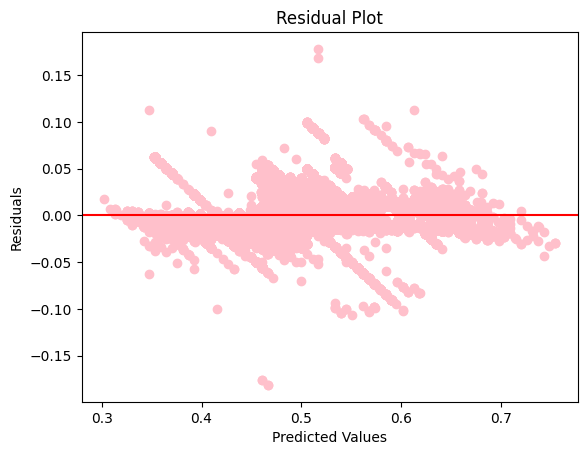

In [58]:
residuals = y_val - y_pred
plt.scatter(y_pred, residuals, color = "pink")
plt.axhline(0, color = "red")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

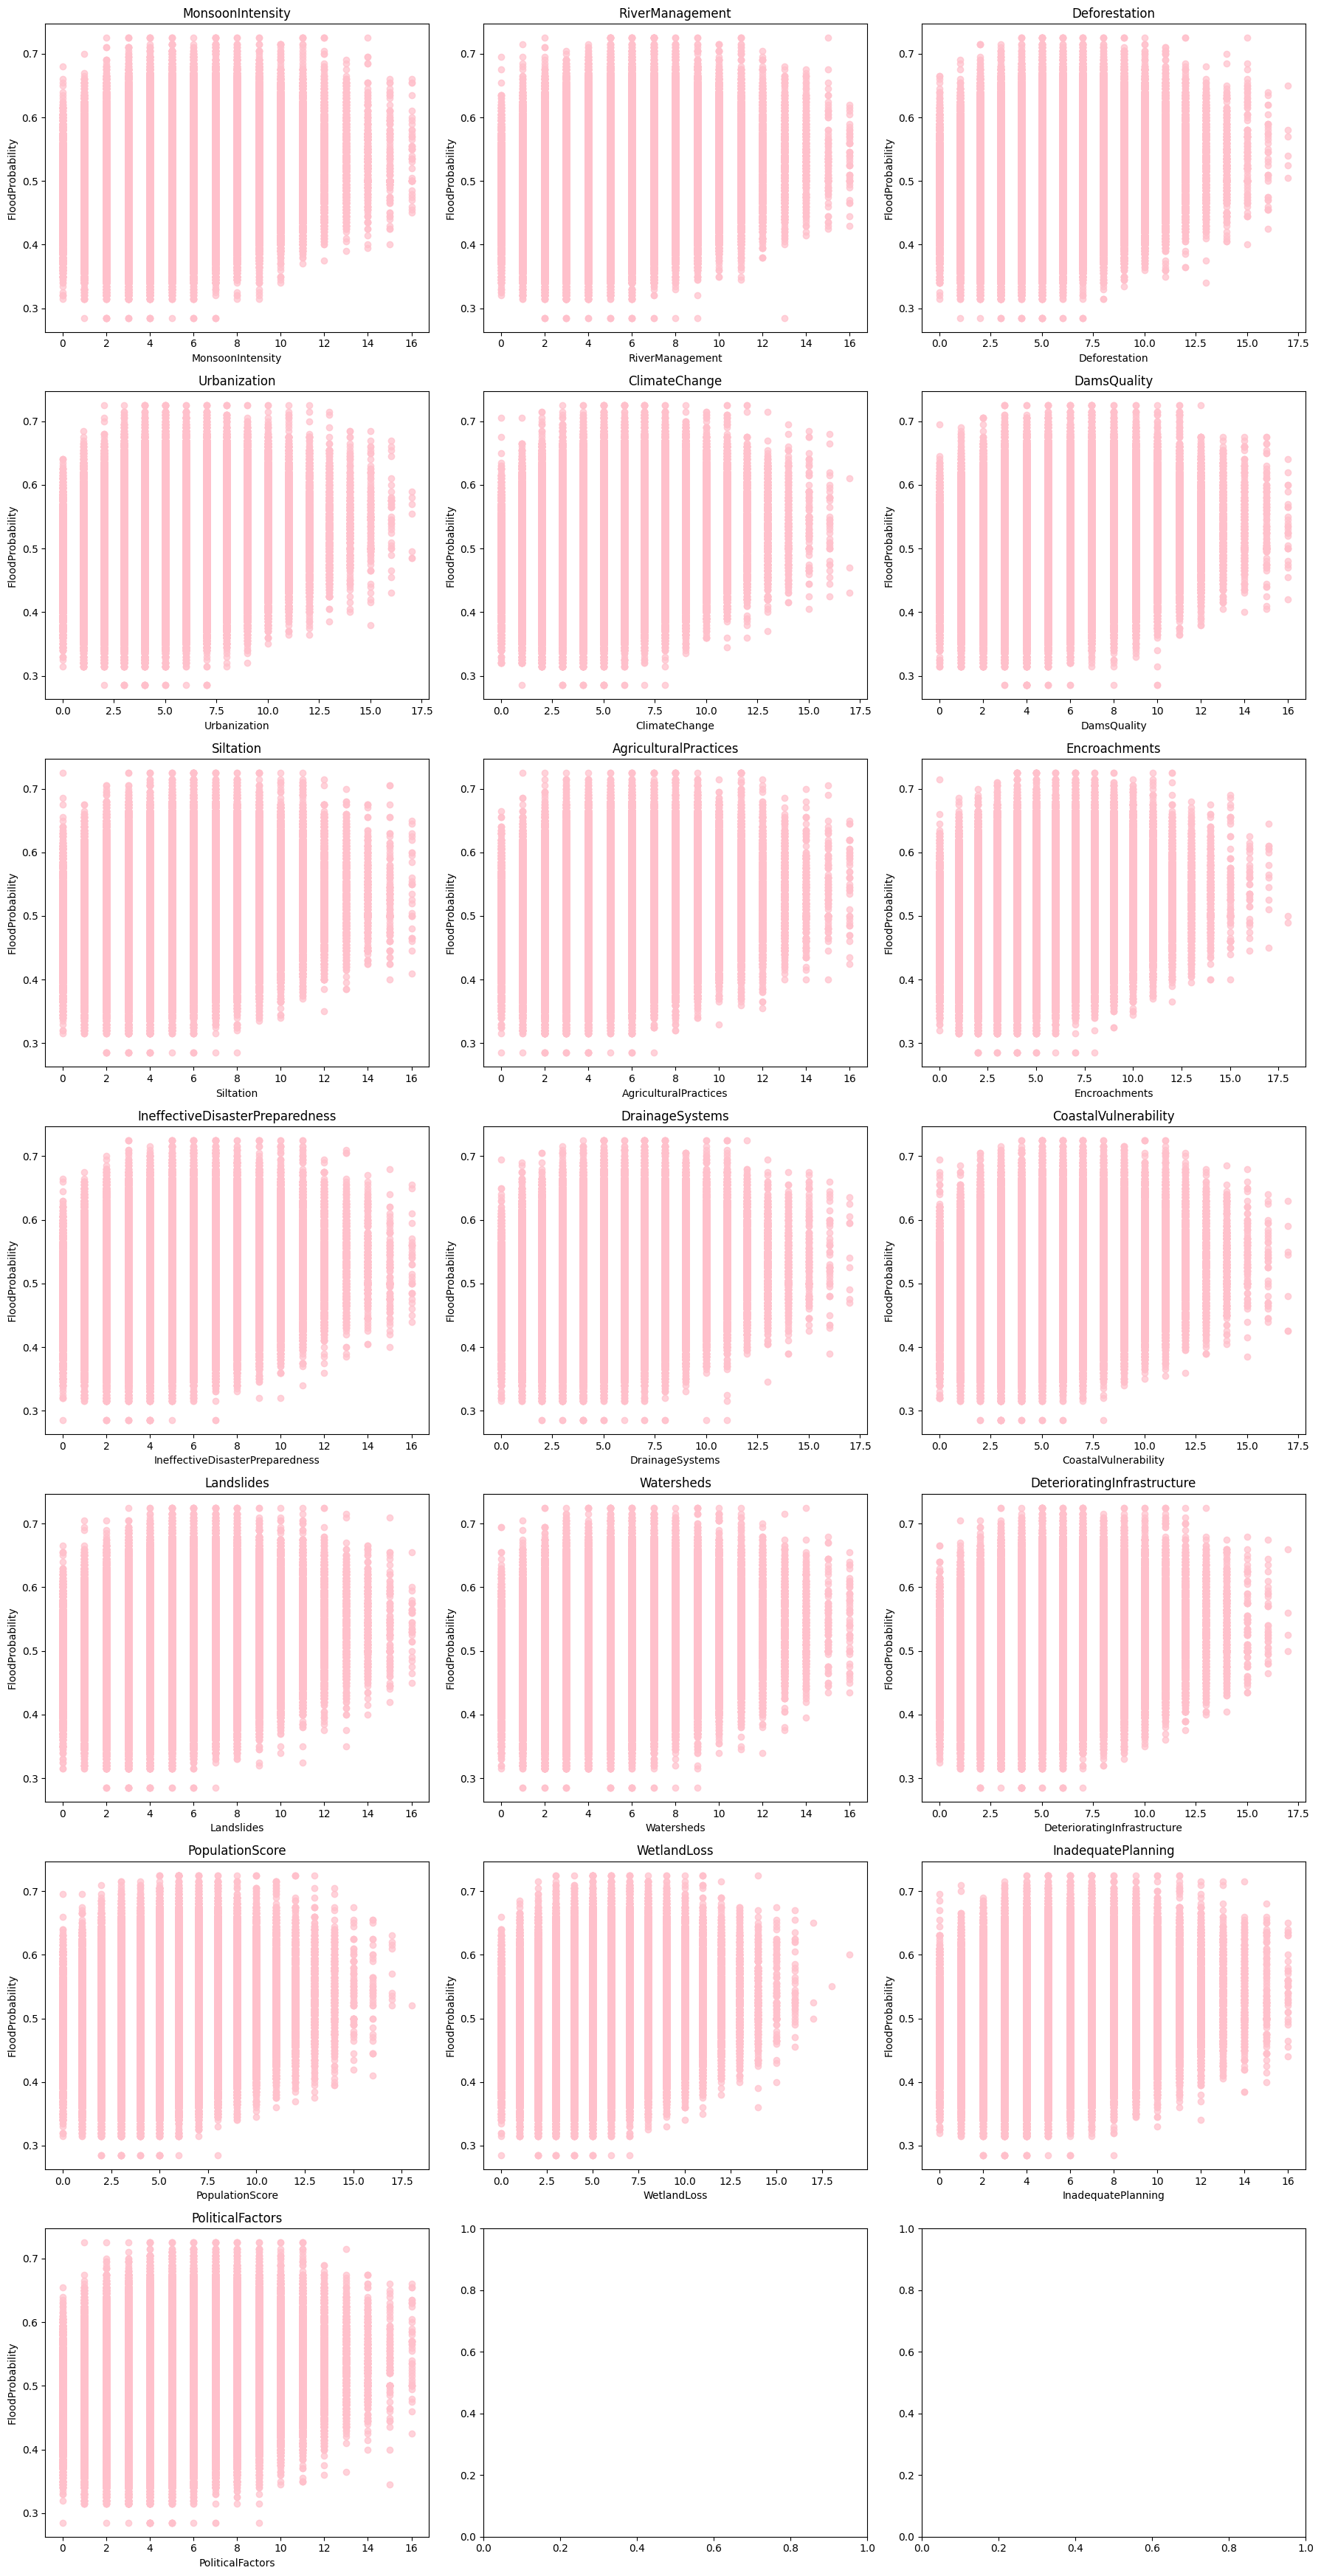

In [59]:
#Correlation of each dependent and independent variable
features = [
    "MonsoonIntensity", "RiverManagement", "Deforestation", "Urbanization",
    "ClimateChange", "DamsQuality", "Siltation", "AgriculturalPractices",
    "Encroachments", "IneffectiveDisasterPreparedness", "DrainageSystems",
    "CoastalVulnerability", "Landslides", "Watersheds",
    "DeterioratingInfrastructure", "PopulationScore", "WetlandLoss",
    "InadequatePlanning", "PoliticalFactors"
]

rows = (len(features) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(traindata[feature], traindata["FloodProbability"], color="pink", alpha=0.7)
    axes[i].set_title(feature, fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("FloodProbability", fontsize=10)

plt.tight_layout()
plt.show()


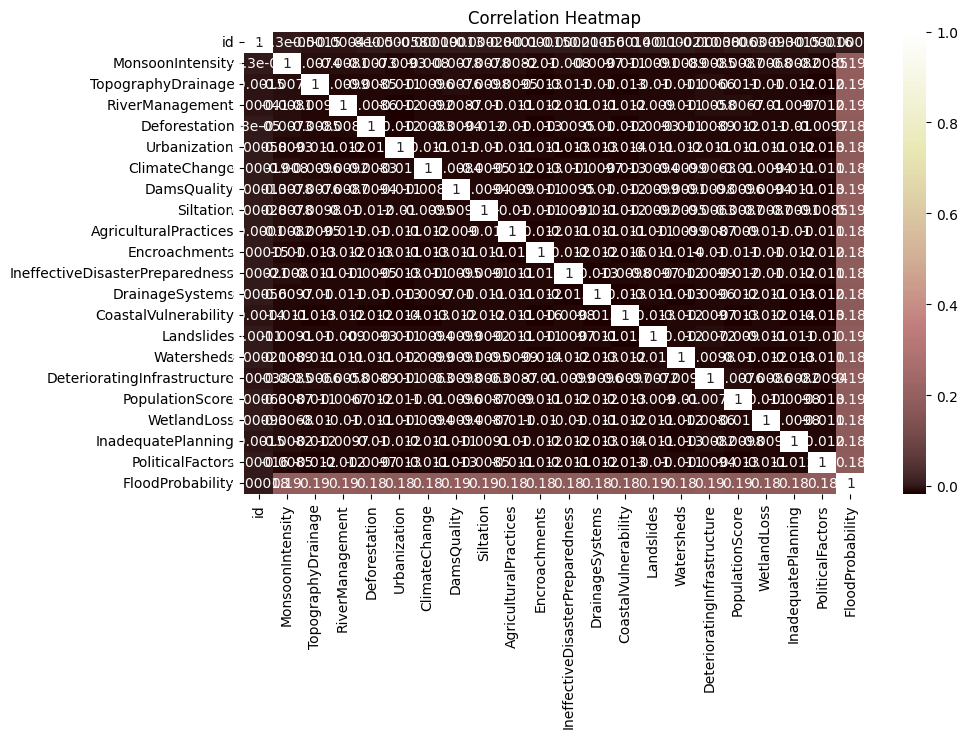

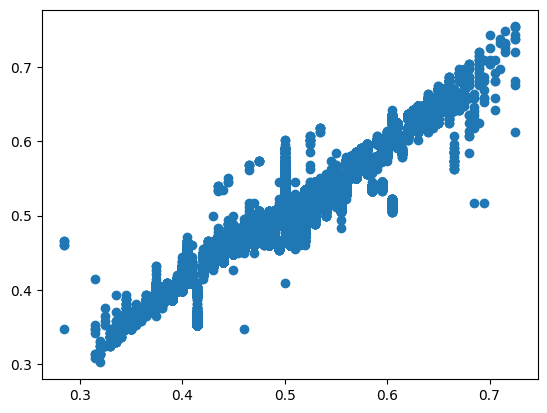

In [60]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = traindata.corr()
sns.heatmap(corr, annot=True, cmap='pink')
plt.title('Correlation Heatmap')
plt.show()
plt.scatter(y_val, y_pred)

In [61]:
correlation = traindata.corr()
print(correlation.to_string())

                                       id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  Encroachments  IneffectiveDisasterPreparedness  DrainageSystems  CoastalVulnerability  Landslides  Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  InadequatePlanning  PoliticalFactors  FloodProbability
id                               1.000000         -0.000093           -0.001518        -0.000413      -0.000080      0.000580      -0.000188     0.000133   0.000281              -0.000103      -0.000147                        -0.000208         0.000558             -0.001386    0.001078    0.000215                    -0.000385         0.000625     0.000931           -0.001535         -0.000155         -0.000184
MonsoonIntensity                -0.000093          1.000000           -0.007362        -0.008070      -0.007251     -0.009309      -0.008031    -0.007787  -0.007836        

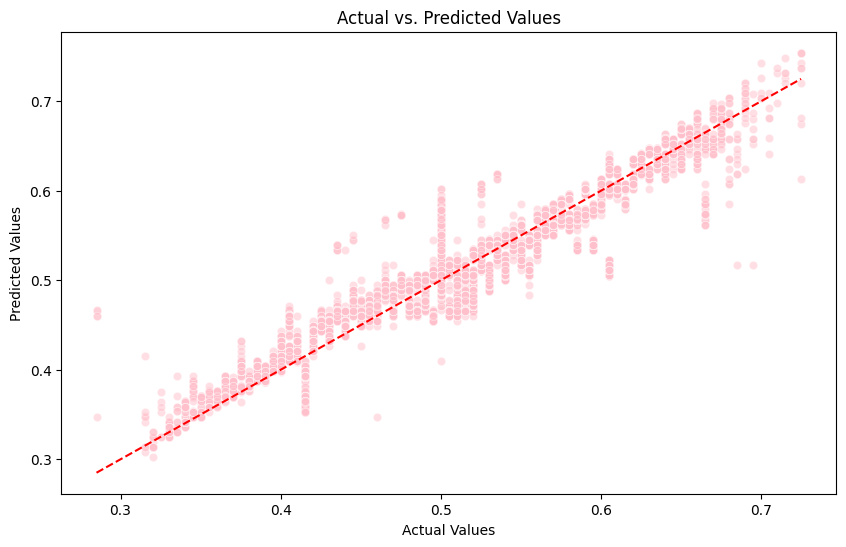

In [62]:
#Scatter Regression
y_pred = model.predict(X_val)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_pred, alpha=0.5, color = "pink")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print(f"R-squared: {r2}")
mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

R-squared: 0.8448773580510154
Mean Squared Error: 0.0004032065305121672


## Test File

In [64]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

In [65]:
test_pred = model.predict(testdata)
print(test_pred)

[0.57361354 0.45527188 0.45475261 ... 0.62431531 0.5509363  0.51152374]


## Sample Submission File

In [68]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

id = samplefile.pop('id')
y_pred = model.predict(testdata)

submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

from google.colab import files
files.download("submission_file.csv")

Submission file created: submission_file.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>